In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data




start='2010-01-01'
end='2019-12-31'

df= data.DataReader('AAPL','yahoo', start,end)
df.head()


ModuleNotFoundError: No module named 'numpy'

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938202
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325806
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298737
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721893
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245941


In [6]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


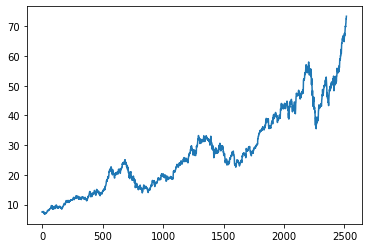

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [10]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

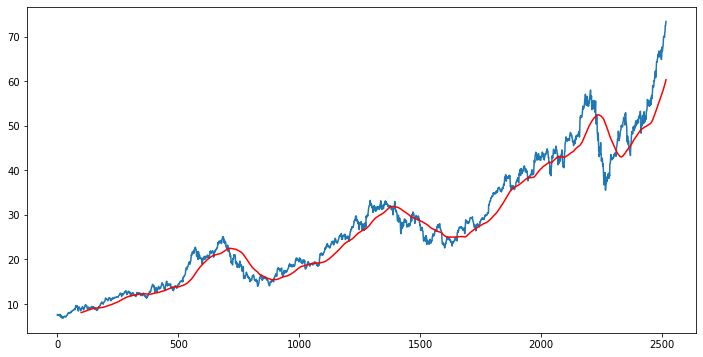

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

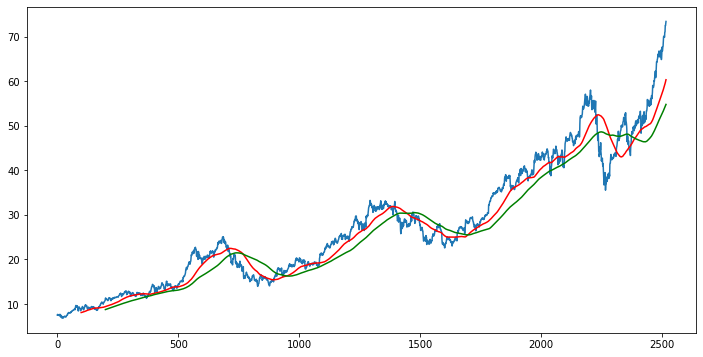

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(2517, 5)

In [15]:
#splitting data into training and testng
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(1761, 1)
(756, 1)


In [16]:
data_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
data_test.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [20]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
data_train_array = Scaler.fit_transform(data_train)
data_train_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [22]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(1661, 100, 1)

In [25]:
# Machine Learning model

In [26]:

from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [34]:
model=Sequential()
model.add(LSTM(units=50 ,activation='relu', return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 ,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 ,activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 ,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 20s 251ms/step - loss: 0.0680
Epoch 2/50
52/52 [==============================] - 13s 241ms/step - loss: 0.0146
Epoch 3/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0117
Epoch 4/50
52/52 [==============================] - 13s 248ms/step - loss: 0.0114
Epoch 5/50
52/52 [==============================] - 13s 256ms/step - loss: 0.0094
Epoch 6/50
52/52 [==============================] - 13s 240ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 13s 240ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0084
Epoch 9/50
52/52 [==============================] - 13s 248ms/step - loss: 0.0083
Epoch 10/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0082
Epoch 11/50
52/52 [==============================] - 13s 241ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 13s 245ms/step - loss: 0.0071
Epoch 13/50
5

In [39]:
model.save("hrkmodel.h5")

In [40]:
data_test.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [41]:
data_train.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [42]:
past_100days=data_train.tail(100)

In [46]:
final_df=past_100days.append(data_test,ignore_index=True)

C:\Users\HARSH\AppData\Local\Temp/ipykernel_7856/513666388.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100days.append(data_test,ignore_index=True)


In [47]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [49]:
input_data=Scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [50]:
input_data.shape

(856, 1)

In [51]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [52]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [53]:
#making predictions

y_predicted=model.predict(x_test)

In [54]:
y_predicted.shape

(756, 1)

In [55]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [56]:
y_predicted

array([[0.12528706],
       [0.12580343],
       [0.12624377],
       [0.12659286],
       [0.12684831],
       [0.12701467],
       [0.12711272],
       [0.12718141],
       [0.12726407],
       [0.12739283],
       [0.12759069],
       [0.12785797],
       [0.12818542],
       [0.12856838],
       [0.1289942 ],
       [0.12944472],
       [0.12990344],
       [0.13035417],
       [0.13079083],
       [0.13122998],
       [0.13167188],
       [0.13211118],
       [0.13254577],
       [0.13299245],
       [0.13354073],
       [0.13425404],
       [0.13518044],
       [0.13635698],
       [0.13780424],
       [0.13947096],
       [0.14135867],
       [0.14344162],
       [0.14570124],
       [0.14812146],
       [0.15056324],
       [0.15304679],
       [0.15557456],
       [0.15814392],
       [0.16073754],
       [0.1633263 ],
       [0.1658792 ],
       [0.16836624],
       [0.17079115],
       [0.17316653],
       [0.17549619],
       [0.17779338],
       [0.18006313],
       [0.182

In [57]:
Scaler.scale_

array([0.02099517])

In [58]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

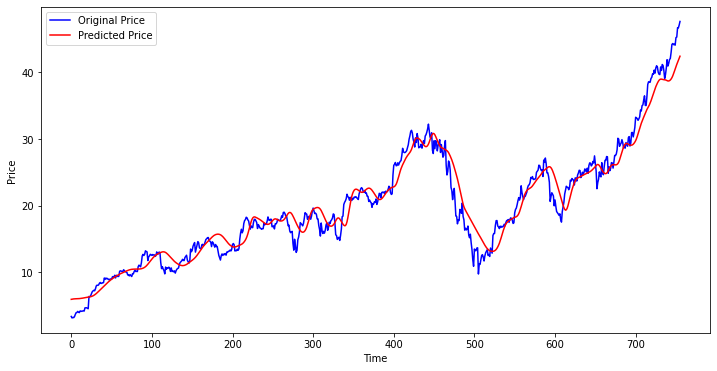

In [61]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()